In [12]:
#importing data management, data visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_excel('/Users/Z002KG2/Downloads/KL_Real_Estate_datacleanv2.xlsx')
df

,Location,Price,Servant room,Rooms,Car Parks,No of Sty,Property Type,Position,Type,Size,Furnishing
0,KLCC,1250000.0,1.0,3,2.0,0,Serviced Residence,Unknown,Built-up,1335.0,Fully Furnished
1,Damansara Heights,6800000.0,NaN,6,NaN,0,Bungalow,Unknown,Land area,6900.0,Partly Furnished
2,Dutamas,1030000.0,NaN,3,2.0,0,Condominium,Corner,Built-up,1875.0,Partly Furnished
3,Cheras,NaN,NaN,0,NaN,0,NaN,Unknown,NaN,0.0,NaN
4,Bukit Jalil,900000.0,1.0,5,2.0,0,Condominium,Corner,Built-up,1513.0,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,1.0,6,NaN,0,Bungalow,Corner,Land area,7168.0,Fully Furnished
53879,Bangsar,5000000.0,NaN,5,NaN,0,Bungalow,Intermediate,Land area,15000.0,Unfurnished
53880,Bangsar,5500000.0,1.0,6,NaN,0,Bungalow,Intermediate,Land area,7168.0,Partly Furnished
53881,Wangsa Maju,480000.0,NaN,3,NaN,0,Condominium,Intermediate,Built-up,1150.0,Unfurnished


In [13]:
df.duplicated().sum()

5018

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.drop(columns=['Servant room', 'Type'], inplace=True)

In [16]:
df.fillna(value={'Car Parks':0, 'Furnishing': 'Unknown', 'Property Type':'Unknown'}, inplace=True)

In [17]:
df.isna().sum()

Location           0
Price            218
Rooms              0
Car Parks          0
No of Sty          0
Property Type      0
Position           0
Size               0
Furnishing         0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Car Parks        0
No of Sty        0
Property Type    0
Position         0
Size             0
Furnishing       0
dtype: int64

In [20]:
df['No of Sty'] = df['No of Sty'].str.replace('-sty', '')

In [25]:
df.fillna(value={'No of Sty': 0}, inplace=True)

In [26]:
df['No of Sty'] = df['No of Sty'].astype(float)
df['Car Parks'] = df['Car Parks'].astype(int)
df['Size'] = df['Size'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48647 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       48647 non-null  int64  
 1   Price          48647 non-null  float64
 2   Rooms          48647 non-null  int64  
 3   Car Parks      48647 non-null  int64  
 4   No of Sty      48647 non-null  float64
 5   Property Type  48647 non-null  int64  
 6   Position       48647 non-null  int64  
 7   Size           48647 non-null  float64
 8   Furnishing     48647 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 3.7 MB


In [28]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Car Parks        0
No of Sty        0
Property Type    0
Position         0
Size             0
Furnishing       0
dtype: int64

Location: 0.5982
Rooms: 0.5062
Car Parks: 0.3025
No of Sty: 0.0874
Property Type: 0.5546
Position: 0.1539
Size: 1.2095
Furnishing: 0.1849


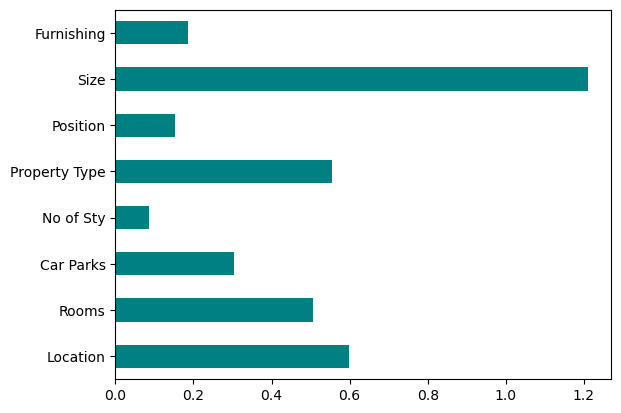

In [29]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df.head(10)

# Encode categorical variables with LabelEncoder
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Property Type'] = encoder.fit_transform(df['Property Type'])
df['Position'] = encoder.fit_transform(df['Position'])
df['Furnishing'] = encoder.fit_transform(df['Furnishing'])

# features (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print feature importance scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")


feat_importances = pd.Series(mi_scores, X.columns[0:len(df.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [31]:
X = df[['Location', 'Rooms', 'Size', 'Property Type']]
y = df['Price']

In [33]:
def regressionMethods(x, y, regressionObject):
  train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.1, random_state=1)
  regressionObject.fit(train_x, train_y)
  predict_test=regressionObject.predict(test_x)
  df_m=pd.DataFrame({'features':x.columns,'coeff':regressionObject.coef_})
  df_m=df_m.sort_values(by=['coeff'])
  df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
  plt.show()
  print("RSquare Value for TEST data is : ",  np.round(regressionObject.score(test_x, test_y)*100, 0))
  print("RSquare Value for TRAIN data is : ", np.round(regressionObject.score(train_x, train_y)*100, 0))
  print("MSE for Test data is : ",np.round(metrics.mean_squared_error(test_y, predict_test), 0))
  print("MAE for Test data is : ",np.round(metrics.mean_absolute_error(test_y, predict_test), 0))

In [38]:
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


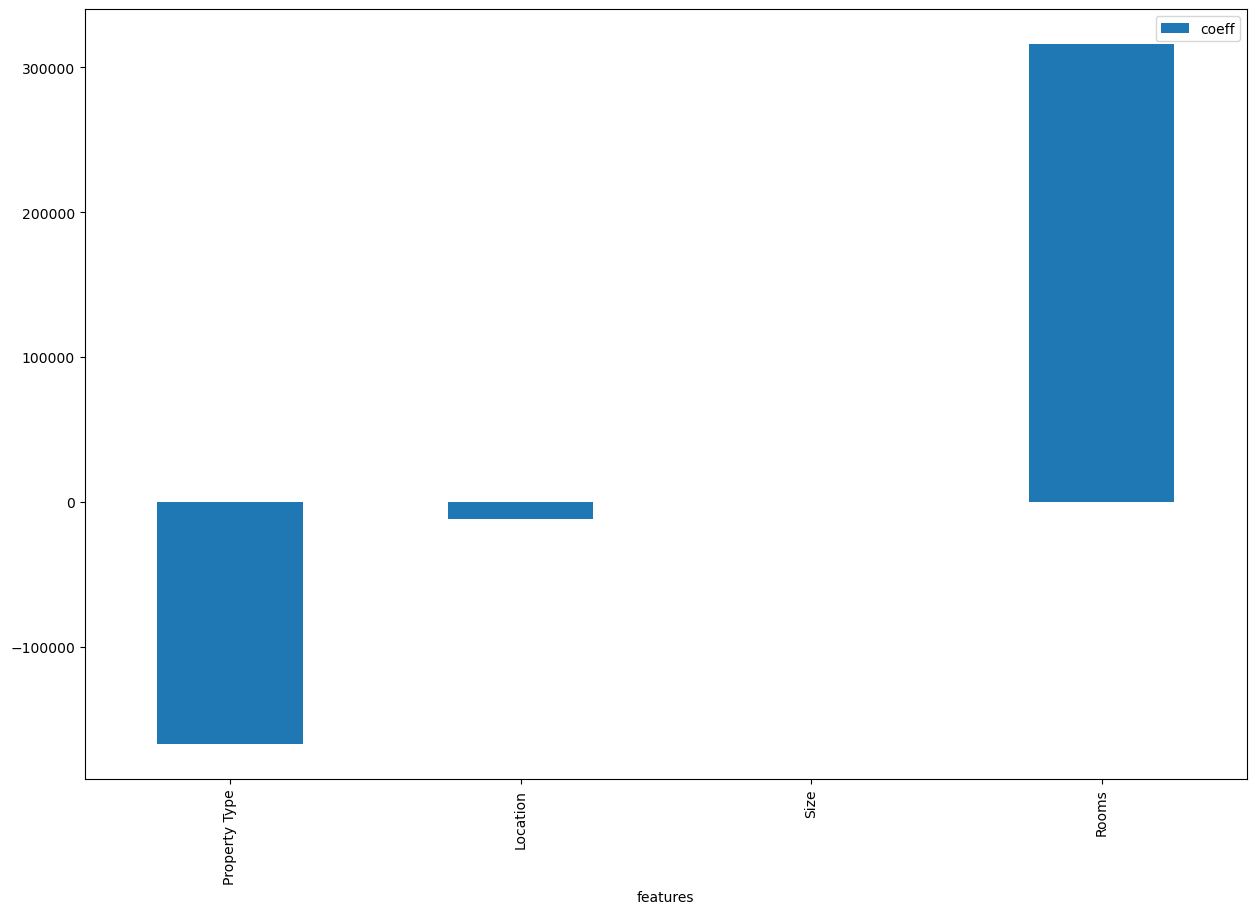

RSquare Value for TEST data is :  0.0
RSquare Value for TRAIN data is :  2.0
MSE for Test data is :  1079828145746798.0
MAE for Test data is :  2110203.0


In [51]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
regressionMethods(X, y, lm)

In [50]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# Index 0 = Location, 2: 'Rooms', 5: 'Property Type', 7: 'Size'
columns_to_keep = [0, 2, 5, 7]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 76.61
RSquare Value for Train data is: 75.64
MSE for Test data is: 8.585526779950472e-05
MAE for Test data is: 0.0008979756611601808


In [40]:
df.columns

Index(['Location', 'Price', 'Rooms', 'Car Parks', 'No of Sty', 'Property Type',
       'Position', 'Size', 'Furnishing'],
      dtype='object')

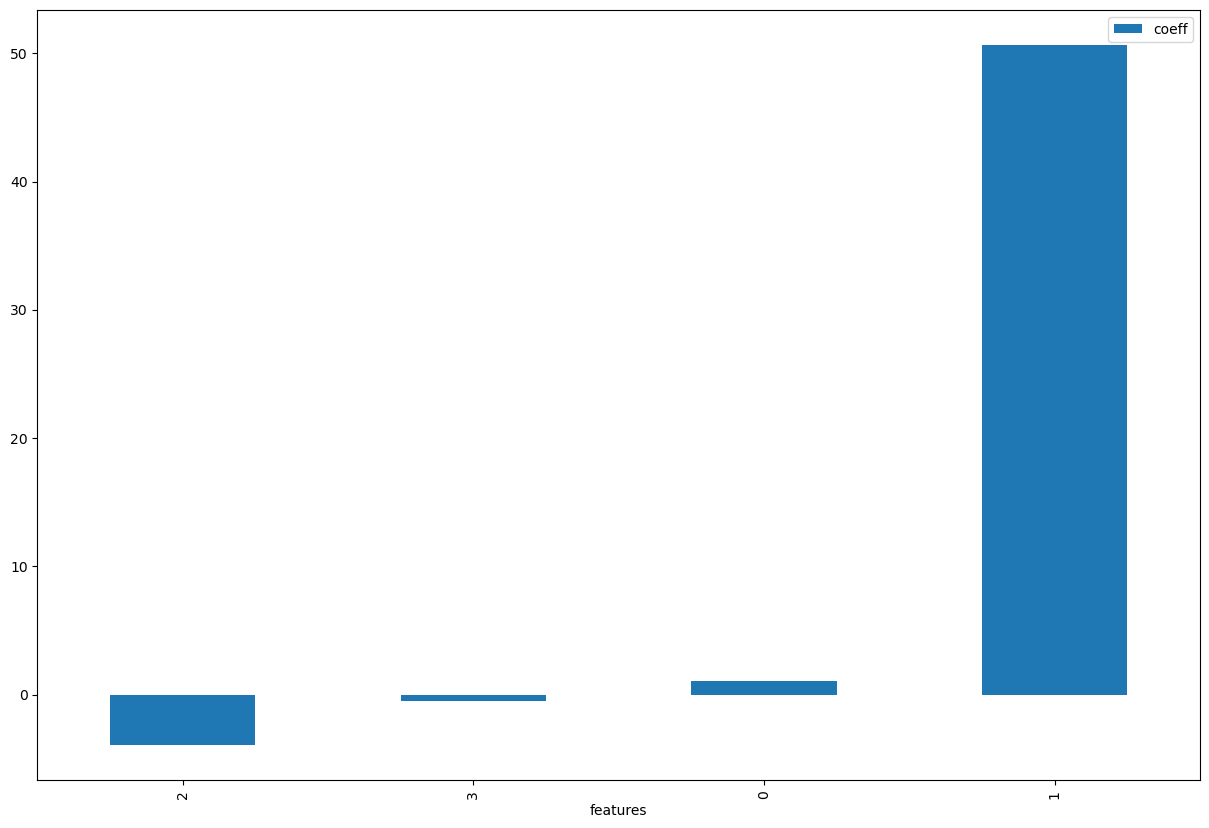

In [55]:
x1 = pd.DataFrame(X_normalized)

df_m=pd.DataFrame({'features':x1.columns,'coeff':regressionObject.coef_})
df_m=df_m.sort_values(by=['coeff'])
df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
plt.show()

In [56]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# All the fields 'Location', 'Rooms', 'Car Parks', 'No of Sty', 'Property Type','Position', 'Size', 'Furnishing'
columns_to_keep = [0, 2, 3, 4, 5, 6, 7, 8]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 78.13
RSquare Value for Train data is: 79.22
MSE for Test data is: 8.030623359671843e-05
MAE for Test data is: 0.0008663389924744473


In [58]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# Index 0 = Location, 5: 'Property Type', 7: 'Size' -- 3 variables
columns_to_keep = [0, 5, 7]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 72.07
RSquare Value for Train data is: 72.99
MSE for Test data is: 0.00010254735774660044
MAE for Test data is: 0.0009257854727329287


In [60]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# All the fields 'Location', 'Rooms', 'Car Parks', 'Property Type', 'Size'
columns_to_keep = [0, 2, 3, 4, 5, 7]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 76.9
RSquare Value for Train data is: 76.76
MSE for Test data is: 8.479088864884809e-05
MAE for Test data is: 0.0009060795750698819
